# 2조 

조장 : 하진기
조원 : 성유기, 이재원, 천민우
기여도 : 각 25%

## 화면 비율 조절

In [32]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 중산층 예측

## 라이브러리 호출

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

## 평가지표 함수 생성

In [3]:
def get_clf_eval(y_test , pred = None, pred_proba = None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# EDA

In [4]:
adult = pd.read_csv("data/adult.csv", header = None, sep=',', names=['Age','Work_Class','fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Target'])
adult.head(15)

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work_Class'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_Num'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>],
       [<AxesSubplot:title={'center':'Capital_Gain'}>,
        <AxesSubplot:title={'center':'Capital_Loss'}>,
        <AxesSubplot:title={'center':'Hours_Per_Week'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

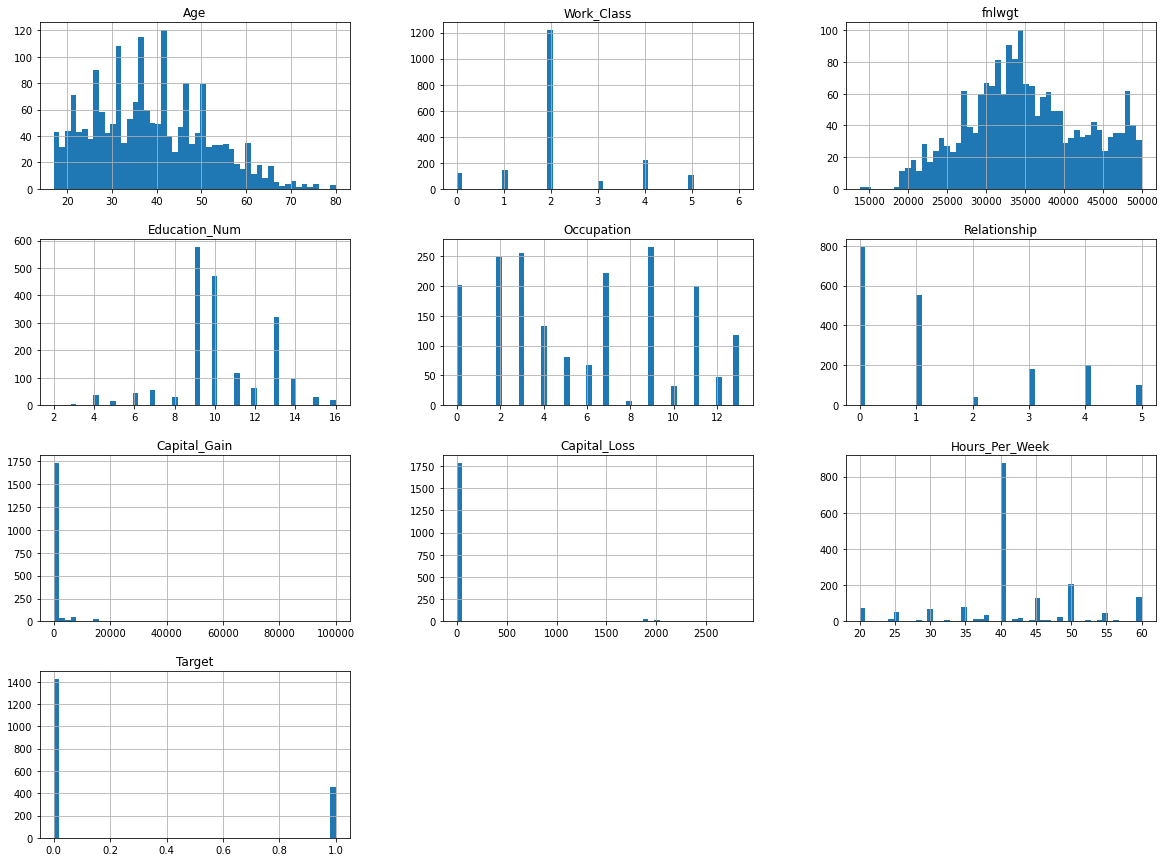

In [31]:
adult.hist(bins=50, figsize=(20, 15))

# PREPROCESSING

## LabelEncoder

In [10]:
def encode_features(dataDF):
    features = ['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country', 'Target', 'Native_Country']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

adult = encode_features(adult)
adult.head()

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Target
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


## Split Data 

In [11]:
y_adult = adult['Target']
x_adult = adult.drop('Target',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_adult, y_adult, test_size=0.2, random_state=11)

## 각 모델 학습, 예측 및 평가

In [12]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train , y_train)
dt_pred = dt_clf.predict(x_test)
get_clf_eval(y_test, dt_pred)
print('\n')
# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train , y_train)
lr_pred = lr_clf.predict(x_test)
get_clf_eval(y_test, lr_pred)
print('\n')
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train , y_train)
rf_pred = rf_clf.predict(x_test)
get_clf_eval(y_test, rf_pred)

오차 행렬
[[3919  605]
 [ 563  946]]
정확도: 0.8064, 정밀도: 0.6099, 재현율: 0.6269, f1: 0.6183, roc_auc: 0.7466


오차 행렬
[[4267  257]
 [1056  453]]
정확도: 0.7824, 정밀도: 0.6380, 재현율: 0.3002, f1: 0.4083, roc_auc: 0.6217




/Users/jjink/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


오차 행렬
[[4194  330]
 [ 569  940]]
정확도: 0.8510, 정밀도: 0.7402, 재현율: 0.6229, f1: 0.6765, roc_auc: 0.7750


## Feature Importances 출력

In [13]:
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

Feature importances:
[0.118 0.033 0.207 0.011 0.119 0.006 0.062 0.199 0.013 0.005 0.115 0.034
 0.066 0.012]


In [14]:
adult.head(3)

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Target
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0


## Preprocessing - Drop Columns

In [17]:
adult = adult.drop("Education", axis = 1)
adult = adult.drop("Marital_Status", axis = 1)
adult = adult.drop("Sex", axis = 1)
adult = adult.drop("Native_Country", axis = 1)
adult = adult.drop("Race", axis = 1)

KeyError: "['Education'] not found in axis"

## Split Data

In [18]:
y_adult = adult['Target']
x_adult = adult.drop('Target',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_adult, y_adult, test_size=0.2, random_state=11)

## 각 모델 학습, 예측 및 평가

In [19]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train , y_train)
dt_pred = dt_clf.predict(x_test)
get_clf_eval(y_test, dt_pred)
print('\n')
# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train , y_train)
lr_pred = lr_clf.predict(x_test)
get_clf_eval(y_test, lr_pred)
print('\n')
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train , y_train)
rf_pred = rf_clf.predict(x_test)
get_clf_eval(y_test, rf_pred)

오차 행렬
[[3928  596]
 [ 567  942]]
정확도: 0.8072, 정밀도: 0.6125, 재현율: 0.6243, f1: 0.6183, roc_auc: 0.7463


오차 행렬
[[4382  142]
 [1108  401]]
정확도: 0.7928, 정밀도: 0.7385, 재현율: 0.2657, f1: 0.3908, roc_auc: 0.6172


오차 행렬
[[4204  320]
 [ 555  954]]
정확도: 0.8550, 정밀도: 0.7488, 재현율: 0.6322, f1: 0.6856, roc_auc: 0.7807


## Preprocessing - Drop Outliers 

/Users/jjink/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

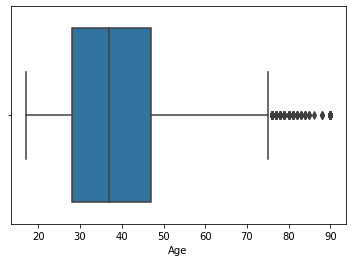

In [20]:
sns.boxplot('Age', data = adult)

In [21]:
outlier = adult[(adult['Age']>80)].index
adult = adult.drop(outlier, axis=0)

/Users/jjink/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

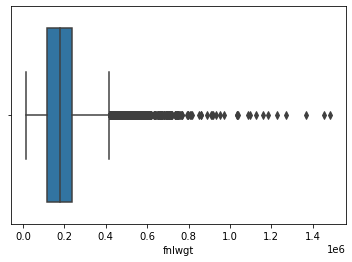

In [22]:
sns.boxplot('fnlwgt', data = adult)

In [23]:
outlier = adult[(adult['fnlwgt'] > 50000)].index
adult = adult.drop(outlier, axis=0)

/Users/jjink/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours_Per_Week'>

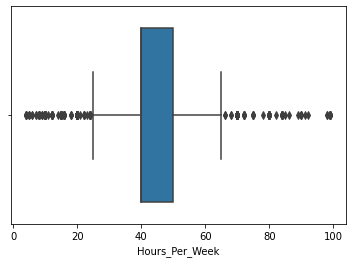

In [24]:
sns.boxplot('Hours_Per_Week', data = adult)

In [25]:
outlier = adult[(adult['Hours_Per_Week'] > 60) | (adult['Hours_Per_Week'] < 20)].index
adult = adult.drop(outlier, axis=0)

## Split Data

In [35]:
y_adult = adult['Target']
x_adult = adult.drop('Target',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_adult, y_adult, test_size=0.2, random_state=11)

## 각 모델 학습, 예측 및 평가

In [27]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train , y_train)
dt_pred = dt_clf.predict(x_test)
get_clf_eval(y_test, dt_pred)
print('\n')
# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train , y_train)
lr_pred = lr_clf.predict(x_test)
get_clf_eval(y_test, lr_pred)
print('\n')
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train , y_train)
rf_pred = rf_clf.predict(x_test)
get_clf_eval(y_test, rf_pred)

오차 행렬
[[251  40]
 [ 41  44]]
정확도: 0.7846, 정밀도: 0.5238, 재현율: 0.5176, f1: 0.5207, roc_auc: 0.6901


오차 행렬
[[281  10]
 [ 63  22]]
정확도: 0.8059, 정밀도: 0.6875, 재현율: 0.2588, f1: 0.3761, roc_auc: 0.6122


오차 행렬
[[269  22]
 [ 31  54]]
정확도: 0.8590, 정밀도: 0.7105, 재현율: 0.6353, f1: 0.6708, roc_auc: 0.7798


In [28]:
params = {'max_depth' : [ 8 , 12, 16 ,20], 'min_samples_split' : [16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(x_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8100
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 24}


## GridSerch CV 수행

In [29]:
params = {'penalty':['l2', 'l1'],'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3 )
grid_clf.fit(x_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

/Users/jjink/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jjink/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

최적 하이퍼 파라미터:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.791


/Users/jjink/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
params = {'n_estimators':[100], 'max_depth' : [6, 8, 10, 12], 'min_samples_leaf' : [8, 12, 18 ], 'min_samples_split' : [8, 16, 20]}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(x_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8273
